In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Unique Players
column_names = ['pid', 'EventName', 'Time', 'Time_utc']
data = pd.read_csv('data/player_logged_in.csv', header=0, names=column_names)
# Get Unique Count of the first column in player logged in csv
uniquePlayersAmount = data['pid'].nunique()
print("Unique Player Amount = ", uniquePlayersAmount)


Unique Player Amount =  11080


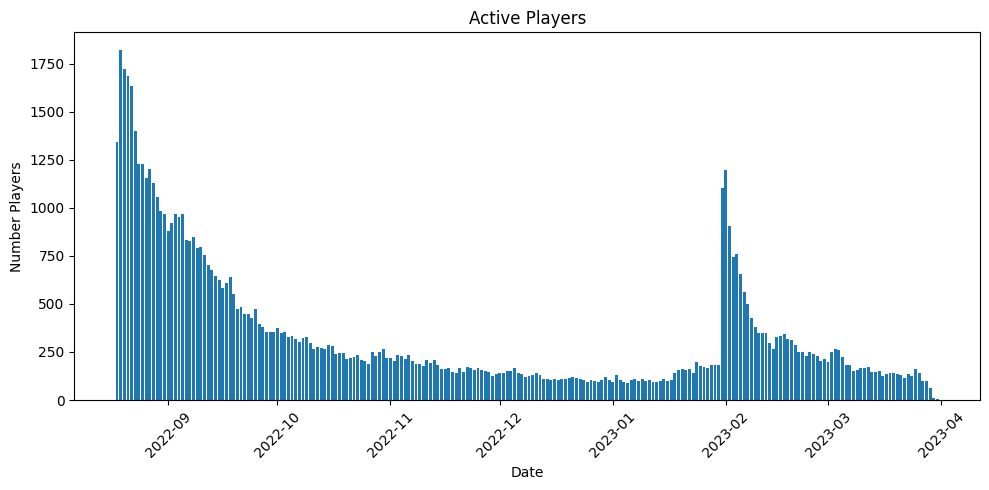

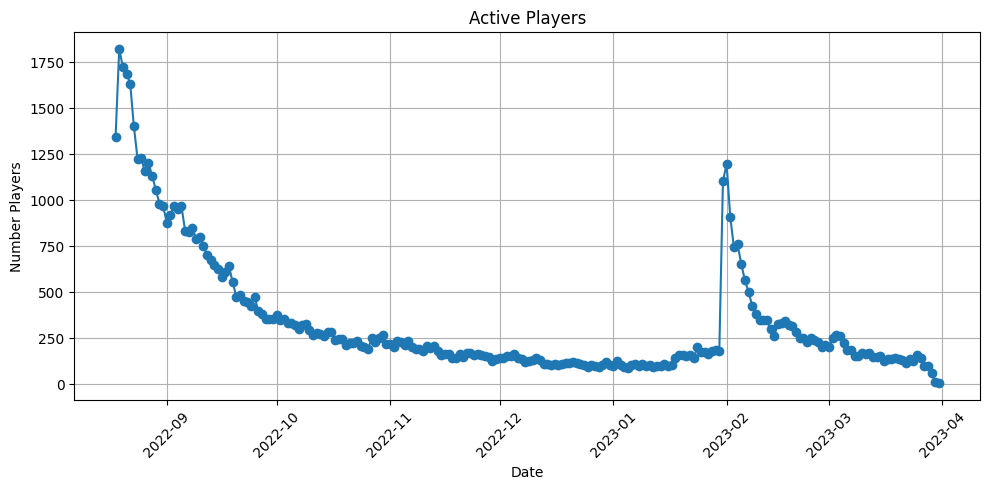

In [3]:
#Unique Players Per Day
#Get needed data
uniquePlayersData = data[['pid', 'Time']].copy()
uniquePlayersData['Date'] = pd.to_datetime(uniquePlayersData['Time']).dt.date
#group data by unique playerID and date
dailyPlayers = uniquePlayersData.groupby('Date')['pid'].nunique().reset_index()
dailyPlayers.columns = ['Date', 'ActivePlayers']

dailyPlayers.sort_values('Date')

#Bar
plt.figure(figsize=(10, 5))
plt.bar(dailyPlayers['Date'], dailyPlayers['ActivePlayers'])
plt.title('Active Players')
plt.xlabel('Date')
plt.ylabel('Number Players')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Line
plt.figure(figsize=(10, 5))
plt.plot(dailyPlayers['Date'], dailyPlayers['ActivePlayers'], marker='o')
plt.title('Active Players')
plt.xlabel('Date')
plt.ylabel('Number Players')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

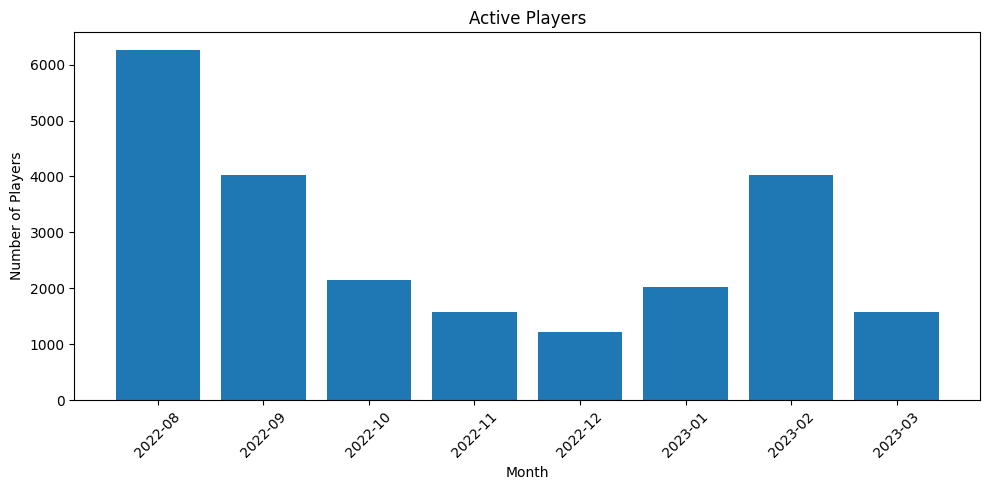

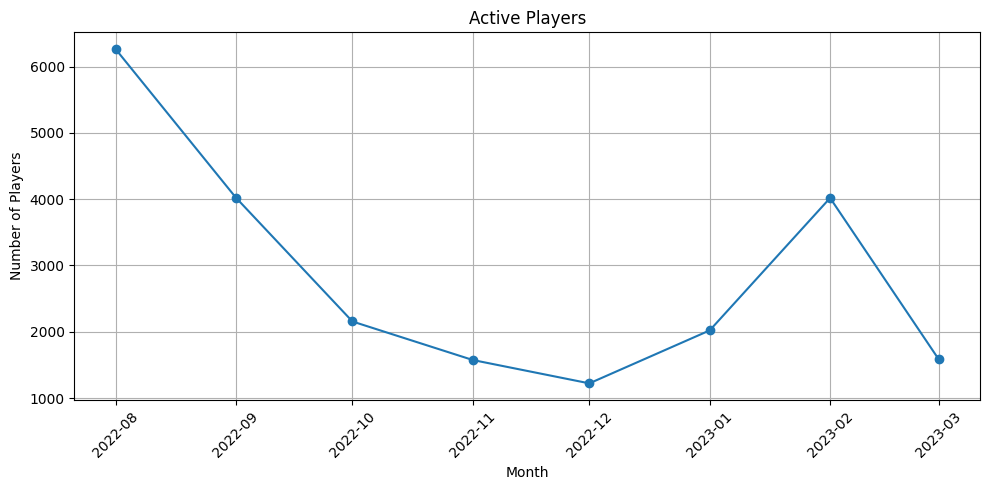

In [4]:
#Unique Players Per Month
uniquePlayersData['Month'] = pd.to_datetime(uniquePlayersData['Time']).dt.to_period('M').astype(str)
#group by unique id with month
monthlyPlayers = uniquePlayersData.groupby('Month')['pid'].nunique().reset_index()
monthlyPlayers['Month'] = pd.to_datetime(monthlyPlayers['Month'])

monthlyPlayers.columns = ['Month', 'ActivePlayers']

monthlyPlayers.sort_values('Month')

#Bar
plt.figure(figsize=(10, 5))
plt.bar(monthlyPlayers['Month'].dt.strftime('%Y-%m'), monthlyPlayers['ActivePlayers'])
plt.title('Active Players')
plt.xlabel('Month')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Line
plt.figure(figsize=(10, 5))
plt.plot(monthlyPlayers['Month'], monthlyPlayers['ActivePlayers'], marker='o')
plt.title('Active Players')
plt.xlabel('Month')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

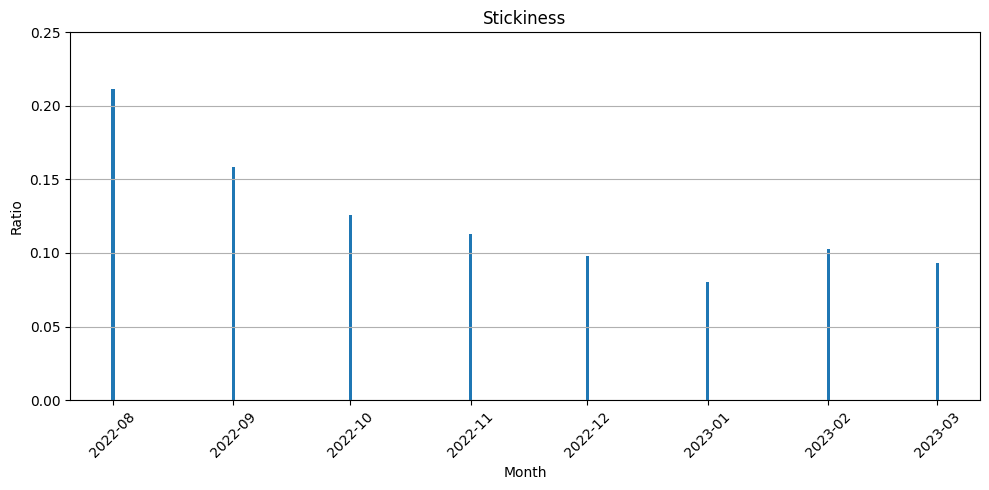

In [5]:
# Stickiness Calculation

# add month to daily players for calc
dailyPlayers['Month'] = pd.to_datetime(dailyPlayers['Date']).dt.to_period('M').dt.to_timestamp()
# get average dau every month
averageDAUPerMonth = dailyPlayers.groupby('Month')['ActivePlayers'].mean().reset_index()
averageDAUPerMonth.columns = ['Month', 'AverageDAU']

stickinessCalcData = pd.merge(averageDAUPerMonth, monthlyPlayers, on='Month')
stickinessCalcData['Stickiness'] = stickinessCalcData['AverageDAU'] / stickinessCalcData['ActivePlayers']

plt.figure(figsize=(10, 5))
plt.bar(stickinessCalcData['Month'], stickinessCalcData['Stickiness'])
plt.title('Stickiness')
plt.xlabel('Month')
plt.ylabel('Ratio')
plt.ylim(0, 0.25)
plt.grid(axis='y') 
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Stickiness tells us the average amount of players that keep coming back to the game over a certain period of time
# On the release of a game the games Stickiness tends to be the highest, which we can see here in the first month of the bar chart
# After the first month the game had a drop in game Stickiness each month.
# The Game stopped this trend in Febuary of 2023 for a single month. Maybe there was a large Update or DLC released ?

Sessions Amount =  105869
Median Session Time =  54.0


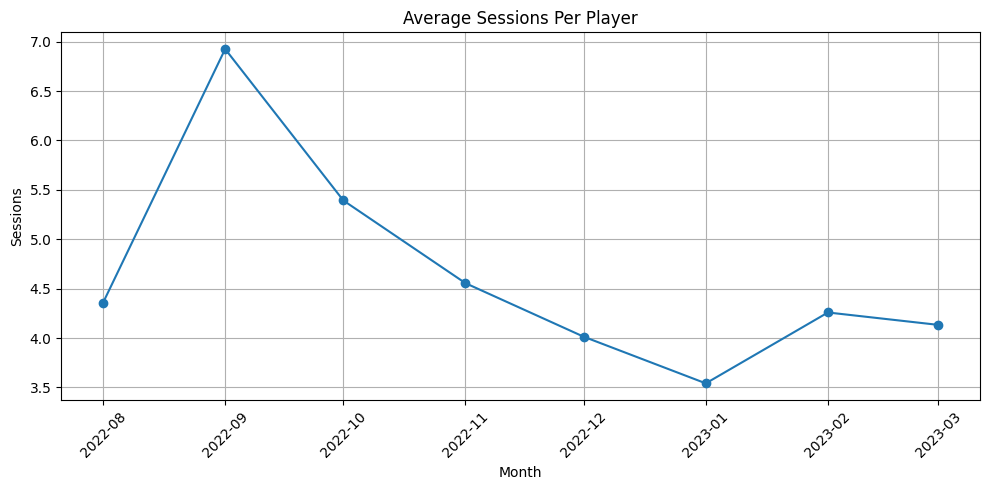

In [ ]:
# Sessions
playerLoggedOffData = pd.read_csv('data/exited_game.csv')
playerLoggedOffData['Time'] = pd.to_datetime(playerLoggedOffData['Time'])

# session amount
allSessions = len(playerLoggedOffData)
print("Sessions Amount = ", allSessions)

medianSessionTime = playerLoggedOffData['CurrentSessionLength'].median()
print("Median Session Time = ", medianSessionTime)

# amount of sessions every month
playerLoggedOffData['Month'] = playerLoggedOffData['Time'].dt.to_period('M').dt.to_timestamp()
sessionsForEachPlayerMonthly = playerLoggedOffData.groupby(['Month', 'pid']).size().reset_index(name='SessionCount')
sessionsPerPlayer = sessionsForEachPlayerMonthly.groupby('Month')['SessionCount'].mean().reset_index()
sessionsPerPlayer.columns = ['Month', 'SessionsPerPlayer']

plt.figure(figsize=(10, 5))
plt.plot(sessionsPerPlayer['Month'], sessionsPerPlayer['SessionsPerPlayer'], marker='o')
plt.title('Average Sessions Per Player')
plt.xlabel('Month')
plt.ylabel('Sessions')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
